In [1]:
# Librería para manipulación y análisis de datos
import pandas as pd

In [2]:
# Descargar archivo preprocesado
!wget http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv

--2021-07-04 22:55:02--  http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv
Connecting to 108.62.123.70:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73094 (71K) [text/csv]
Saving to: ‘new_number_garments_worker_productivity.csv.3’

new_number_garments 100%[===================>]  71.38K   203KB/s    in 0.4s    

2021-07-04 22:55:02 (203 KB/s) - ‘new_number_garments_worker_productivity.csv.3’ saved [73094/73094]



In [3]:
%ls

new_number_garments_worker_productivity.csv
new_number_garments_worker_productivity.csv.1
new_number_garments_worker_productivity.csv.2
new_number_garments_worker_productivity.csv.3
sample_data/
scikit-learn/


In [4]:
#Lectura del grupo de datos CSV
file_name = "new_number_garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un CSV
dataset = pd.read_csv(file_name)

In [5]:
print(dataset.head())

   date  quarter  ...  no_of_workers  actual_productivity
0    56        1  ...           59.0             0.940725
1    56        1  ...            8.0             0.886500
2    56        1  ...           30.5             0.800570
3    56        1  ...           30.5             0.800570
4    56        1  ...           56.0             0.800382

[5 rows x 15 columns]


In [6]:
print(dataset.shape)

(1197, 15)


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int64  
 2   department             1197 non-null   int64  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
print(dataset.describe())

              date      quarter  ...  no_of_workers  actual_productivity
count  1197.000000  1197.000000  ...    1197.000000          1197.000000
mean     28.917293     2.020050  ...      34.609858             0.735091
std      17.098789     1.557568  ...      22.197687             0.174488
min       0.000000     0.000000  ...       2.000000             0.233705
25%      14.000000     1.000000  ...       9.000000             0.650307
50%      29.000000     1.000000  ...      34.000000             0.773333
75%      44.000000     4.000000  ...      57.000000             0.850253
max      58.000000     4.000000  ...      89.000000             1.120437

[8 rows x 15 columns]


#Bagging regressor.

Un regresor de Bagging es un metaestimador de conjunto que ajusta los regresores base cada uno en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales (ya sea por votación o promediando) para formar una predicción final. Un metaestimador de este tipo se puede utilizar típicamente como una forma de reducir la varianza de un estimador de caja negra (por ejemplo, un árbol de decisión), al introducir la aleatorización en su procedimiento de construcción y luego hacer un conjunto a partir de él.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

Fuente: Scikit-Learn - Ensemble Learning : Bootstrap Aggregation(Bagging) & Random Forests
https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests

Fuente: Installing the development version of scikit-learn

https://scikit-learn.org/dev/developers/advanced_installation.html

In [9]:
#Instalación de nueva versión de Science Kit Learn v0.24, la actual es v0.23 - Para soportar mean_absolute_percentage_error de sklearn.metrics
!git clone git://github.com/scikit-learn/scikit-learn.git  # add --depth 1 if your connection is slow
%cd scikit-learn
!pip install cython
!pip install --verbose --no-build-isolation --editable .
!python -c "import sklearn; sklearn.show_versions()"

fatal: destination path 'scikit-learn' already exists and is not an empty directory.
/content/scikit-learn
Created temporary directory: /tmp/pip-ephem-wheel-cache-seye7gfe
Created temporary directory: /tmp/pip-req-tracker-qsjqzfyf
Created requirements tracker '/tmp/pip-req-tracker-qsjqzfyf'
Created temporary directory: /tmp/pip-install-xn2ohn5u
Obtaining file:///content/scikit-learn
  Added file:///content/scikit-learn to build tracker '/tmp/pip-req-tracker-qsjqzfyf'
    Created temporary directory: /tmp/pip-modern-metadata-xelhy2i2
    Running command /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/_in_process.py prepare_metadata_for_build_wheel /tmp/tmpax_9i6f1
    C compiler: x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fs

In [10]:
# Cargar librerías como ensemble que contiene Bagging Regressor y Grid Search CV,
# también se carga las regresiones para formas parte de Bagging: KNeighborsRegressor, LinearRegression y LogisticRegression, y otras herramientas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

In [11]:
# Dividir variables dependientes de la variable dependiente
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]

In [12]:
# Verificar división
print(X)
print(X.shape)
print(y)
print(y.shape)

      date  quarter  department  ...  idle_men  no_of_style_change  no_of_workers
0       56        1           0  ...         0                   0           59.0
1       56        1           2  ...         0                   0            8.0
2       56        1           0  ...         0                   0           30.5
3       56        1           0  ...         0                   0           30.5
4       56        1           0  ...         0                   0           56.0
...    ...      ...         ...  ...       ...                 ...            ...
1192     3        4           1  ...         0                   0            8.0
1193     3        4           1  ...         0                   0            8.0
1194     3        4           1  ...         0                   0            8.0
1195     3        4           1  ...         0                   0           15.0
1196     3        4           1  ...         0                   0            6.0

[1197 rows x 14

Dividiremos nuestro conjunto de datos para usar el 15% para el entrenamiento y dejar el resto para la prueba. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10025, random_state=123)

In [14]:
#Verificar el número de muestras de prueba
print(X_test.shape)
print(y_test.shape)

(120, 14)
(120,)


In [15]:
# Se establecen los parámetros como el estimador y el número de estimadores
# base_estimator: objeto, predeterminado = None
# El estimador base para ajustarse a subconjuntos aleatorios del conjunto de datos.
# Si es None, entonces el estimador base es un DecisionTreeRegressor.

#params = {'base_estimator': SVR(),'n_estimators': 100,'random_state': 123}
params = {'base_estimator': None ,'n_estimators': 100,'random_state': 123}

In [16]:
#Se aplican los parámetros a Bagging Regressor
bagg_reg = BaggingRegressor(**params)


In [17]:
# Se hace el ajuste con datos de entrenamiento
bagg_reg.fit(X_train,y_train)

BaggingRegressor(n_estimators=100, random_state=123)

In [18]:
# Se hace una predicción con valores de validación
bagg_predict = bagg_reg.predict(X_test)
print(bagg_predict)
print(bagg_predict.shape)
print(y_test)
print(y_test.shape)

[0.68398716 0.87032706 0.68694504 0.68569159 0.76585972 0.6164759
 0.9038792  0.44984357 0.49342802 0.72701702 0.92857681 0.76460293
 0.89977422 0.71824755 0.79411861 0.69530723 0.85979071 0.88895354
 0.66609283 0.66256593 0.60765105 0.63331603 0.83826085 0.74415763
 0.85947165 0.8501486  0.75096181 0.87016243 0.56703985 0.61352766
 0.78139502 0.86308761 0.7963112  0.58597406 0.65348069 0.79253369
 0.62099259 0.74959754 0.7416316  0.62227463 0.54454645 0.79845189
 0.89959256 0.765272   0.67960057 0.62414131 0.81323704 0.89842309
 0.52575578 0.78380814 0.4865661  0.74052612 0.79786042 0.73227405
 0.79532971 0.60794482 0.98616638 0.85965159 0.69942449 0.87772258
 0.83816738 0.86827208 0.44629258 0.5739721  0.79949335 0.66361431
 0.80538842 0.80223666 0.8089474  0.6827945  0.68901775 0.65077777
 0.51361907 0.78401226 0.84703822 0.82042337 0.80179174 0.95769738
 0.80039512 0.80684366 0.76697458 0.66649365 0.88674741 0.78946058
 0.69463609 0.86480684 0.37672084 0.78415376 0.69663607 0.88490

Veamos también el error cuadrático medio en los datos de validación, la raíz del error cuadrático medio en los datos de validación y el puntaje (score) de entrenamiento y validación.

Fuente: Science Kit, Metrics and scoring: quantifying the quality of predictions

https://scikit-learn.org/stable/modules/model_evaluation.html

Fuente: Data Quest - Understanding Regression Error Metrics in Python 

https://www.dataquest.io/blog/understanding-regression-error-metrics/

In [19]:
mse = mean_squared_error(y_test, bagg_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0192


In [20]:
rmse = np.sqrt(mean_squared_error(y_test, bagg_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.138660


In [21]:
mae = mean_absolute_error(y_test, bagg_predict)
print("MAE: %f" % (mae))

MAE: 0.085038


In [22]:
mape = mean_absolute_percentage_error(y_test, bagg_predict)
print("MAPE: %f" % (mape))

MAPE: 0.159528


In [23]:
bagg_score_train = bagg_reg.score(X_train, y_train)
print(bagg_score_train)

0.9315338297779538


In [24]:
bagg_score_test = bagg_reg.score(X_test, y_test)
print(bagg_score_test)

0.41840111957504944


El entrenamiento no esta presenta sobreajuste (overfitting) y el puntaje con datos de validación son bajos.

Trace la desviación del entrenamiento. Visualizaremos los resultados. Para hacer eso, primero calcularemos la desviación del conjunto de prueba y luego la graficaremos contra las iteraciones de impulso.

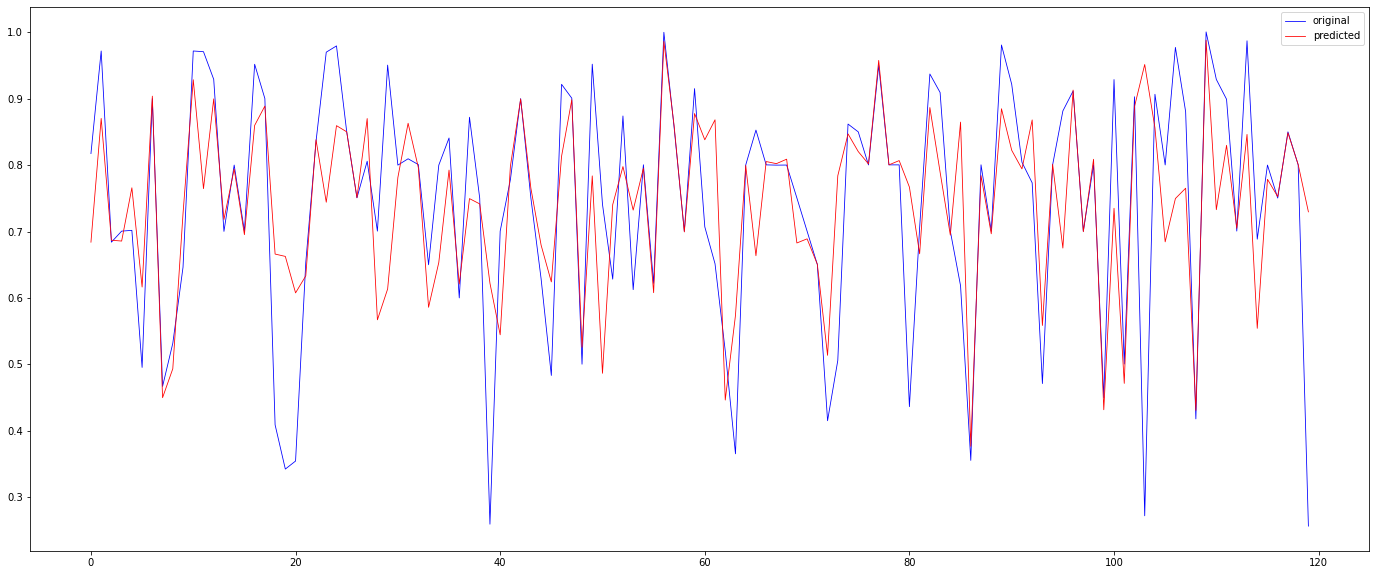

In [25]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, bagg_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#GridSearchCV.
Es una clase contenedora proporcionada por sklearn que recorre todos los parámetros proporcionados como parámetro params_grid con una serie de pliegues de validación cruzada proporcionados como parámetro cv, evalúa el rendimiento del modelo en todas las combinaciones y almacena todos los resultados en el atributo cv_results_. También almacena el modelo que se desempeña mejor en todos los pliegues de validación cruzada en el atributo best_estimator_ y la mejor puntuación en el atributo best_score_.

El parámetro n_jobs lo proporcionan muchos estimadores. Acepta el número de núcleos que se utilizarán para la paralelización. Si se da el valor de -1, entonces usa todos los núcleos. Utiliza la biblioteca de procesamiento paralelo joblib para ejecutar cosas en paralelo en segundo plano.

Probaremos varios valores para los hiperparámetros mencionados anteriormente para encontrar el mejor estimador para nuestro conjunto de datos haciendo una validación cruzada.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
# Verificar datos de entrenamiento
print(X_train.shape[0])
print(X_train.shape[1])

1077
14


In [27]:
# Establecer parámetros a probar
# Si es None, entonces el estimador base es un DecisionTreeRegressor.
%%time

#n_samples = X_train.shape[0]
#n_features = X_train.shape[0]

params = {'base_estimator': [None, LinearRegression(), LogisticRegression(), KNeighborsRegressor(), SVR()],
          'n_estimators': [25,50,100,150],
          #'max_samples': [0.5,1.0, n_samples//2,],
          #'max_features': [0.5,1.0, n_features//2,],
          'max_samples': [0.25,0.5,1.0],
          'max_features': [0.25,0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}



CPU times: user 61 µs, sys: 12 µs, total: 73 µs
Wall time: 75.3 µs


In [28]:
bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=123, n_jobs=-1), param_grid =params, cv=5, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, y_train)



Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/content/scikit-learn/sklearn/model_selection/_search.py:893: UserWarning: One or more of the test scores are non-finite: [ 2.78627086e-01  3.01662375e-01  3.14747684e-01  3.21710597e-01
  3.19495714e-01  3.37342754e-01  3.40043641e-01  3.45477557e-01
  3.34789049e-01  3.47699441e-01  3.49803344e-01  3.55523923e-01
  3.61006451e-01  4.17204294e-01  4.37655561e-01  4.38237119e-01
  4.06029199e-01  4.52400736e-01  4.65350211e-01  4.69472687e-01
  4.31467204e-01  4.68232435e-01  4.85171758e-01  4.89768386e-01
  4.52675394e-01  4.75418345e-01  4.84310887e-01  4.81635206e-01
  4.77287042e-01  4.96706122e-01  5.07695244e-01  5.08656454e-01
  4.98247327e-01  5.09390136e-01  5.19575401e-01  5.25745316e-01
  3.08089790e-01  2.95395770e-01  3.21946688e-01  3.33487310e-01
  3.22899885e-01  3.17970434e-01  3.42579080e-01  3.53195354e-01
  3.49504290e-01  3.37451440e-01  3.58754928e-01  3.67374040e-01
  4.63204208e-01  4.75808412e-01  4.71891150e-01  4.69487460e-01
  4.91420178e-01  5.04823272e-01 

GridSearchCV(cv=5, estimator=BaggingRegressor(n_jobs=-1, random_state=123),
             n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            LogisticRegression(),
                                            KNeighborsRegressor(), SVR()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.25, 0.5, 1.0],
                         'max_samples': [0.25, 0.5, 1.0],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [29]:
# Se muestran los mejores puntajes y mejor modelo 
print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Train R^2 Score : 0.916
Test R^2 Score : 0.419
Best R^2 Score Through Grid Search : 0.526
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 150}


Impresión de los primeros resultados de validación cruzada. GridSearchCV mantiene los resultados de todas las combinaciones de parámetros probadas con todas las divisiones de validación cruzada. Podemos acceder a los resultados de todas las iteraciones como un diccionario llamando al atributo cv_results_ en él.

In [30]:
cross_val_results = pd.DataFrame(bagging_regressor_grid.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head() ## Imprimir primeros resultados de la tabla de validación cruzada.

Number of Various Combinations of Parameters Tried : 720


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_bootstrap,param_bootstrap_features,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106959,0.001767,0.106500,0.002049,None,True,True,0.25,0.25,25,"{'base_estimator': None, 'bootstrap': True, 'b...",0.296747,0.227759,0.307943,0.283619,0.277067,0.278627,0.027578,173
1,0.205426,0.000611,0.111039,0.008824,None,True,True,0.25,0.25,50,"{'base_estimator': None, 'bootstrap': True, 'b...",0.316068,0.264269,0.333892,0.301455,0.292628,0.301662,0.023351,153
2,0.311780,0.002218,0.105910,0.002391,None,True,True,0.25,0.25,100,"{'base_estimator': None, 'bootstrap': True, 'b...",0.313655,0.285561,0.357650,0.310545,0.306328,0.314748,0.023589,143
3,0.454620,0.049502,0.106922,0.003087,None,True,True,0.25,0.25,150,"{'base_estimator': None, 'bootstrap': True, 'b...",0.322497,0.297484,0.361115,0.320575,0.306882,0.321711,0.021732,138
4,0.106727,0.000628,0.106280,0.002509,None,True,True,0.25,0.5,25,"{'base_estimator': None, 'bootstrap': True, 'b...",0.334648,0.263621,0.342097,0.313104,0.344008,0.319496,0.030014,139


# Evaluación del mejor modelo 

In [31]:
# Predecir usando datos de prueba 
bagging_regressor_grid_predict_train = bagging_regressor_grid.predict(X_train)
bagging_regressor_grid_predict = bagging_regressor_grid.predict(X_test)

Veamos también el error cuadrático medio en los datos de prueba, la raíz del error cuadrático medio en los datos de prueba y el puntaje (score) de entrenamiento y pruebas.

In [32]:
mse = mean_squared_error(y_train, bagging_regressor_grid_predict_train)
print("The mean squared error (MSE) on train set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0025


In [33]:
rmse = np.sqrt(mean_squared_error(y_train, bagging_regressor_grid_predict_train))
print("RMSE: %f" % (rmse))

RMSE: 0.050172


In [34]:
mae = mean_absolute_error(y_train, bagging_regressor_grid_predict_train)
print("MAE: %f" % (mae))

MAE: 0.031555


In [35]:
mape = mean_absolute_percentage_error(y_train, bagging_regressor_grid_predict_train)
print("MAPE: %f" % (mape))

MAPE: 0.057201


In [36]:
reg_score_train = bagging_regressor_grid.score(X_train, y_train)
print(reg_score_train)

0.9164237643694209


In [37]:
mse = mean_squared_error(y_test, bagging_regressor_grid_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0192


In [38]:
rmse = np.sqrt(mean_squared_error(y_test, bagging_regressor_grid_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.138567


In [39]:
mae = mean_absolute_error(y_test, bagging_regressor_grid_predict)
print("MAE: %f" % (mae))

MAE: 0.088306


In [40]:
mape = mean_absolute_percentage_error(y_test, bagging_regressor_grid_predict)
print("MAPE: %f" % (mape))

MAPE: 0.165778


In [41]:
reg_score_test = bagging_regressor_grid.score(X_test, y_test)
print(reg_score_test)

0.41918322784829254


El puntaje para datos de entrenamiento no presentan sobreajuste y para datos de prueba mejoró en el tercer decimal.

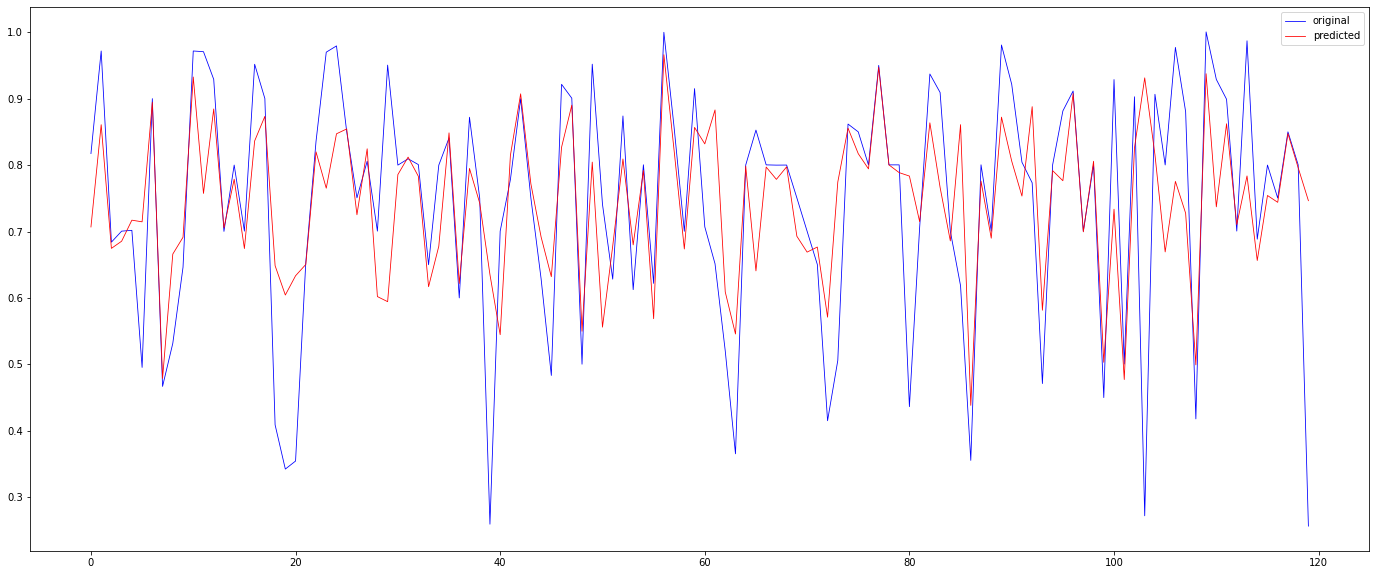

In [42]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, bagging_regressor_grid_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()